# WeatherPy
----

### Analysis

----

*City Latitude vs. Max Temperature(F):
--
As we move away from the equator the temperature in northern hemsphere decreases, as is expected currently due to the winter season.What's more, as we move away from the equator in the southern hemsphere, where summer is currently the present season, the temperature also begins to decrease. 

We can conclude that there is a positive correlation between City Latitude and Max temperature(F) as we move away from the equator.



*City Latitude vs. Humidity (%):
--
We can notice that as we move away from the equator (Lat 0), the humidity (%) concetration increases. We can also note that there are far more cities with higher humidity (%) between the 80-100%



*City Latitude vs. Cloudiness (%):
--
There's no correlation betwen City Latitude and Cloudiness(%). We can also conclude that there most concentratiosn of cloudiness in the northern hemisphere, latitudes higher than 20.



*City Latitude vs. Wind Speed (mph):
--
There no correlation between Wind Speed(%) and City Latitude. One observation we can draw is most of the Wind Speed(%) tends to concentrate between 0-8 mph, we can also note that the highest Wind Speed(%) happens at Cities in the top northern hemisphere.

----

In [303]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "wea_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [305]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#size == number of cities to pull out
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# "https://github.com/wingchen/citipy" -doc
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is not in list already, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count, need min 500 cities
len(cities)
#print(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [306]:
#save config info
url = "http://api.openweathermap.org/data/2.5/weather?"

#temperature in Fahrenheit
units = "Imperial"
#print(cities)

#lists
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_spd = []

counter = 1
set_counter = 1

print("Beginning Data Retrieval")
print("-------------------------------")
#forloop, go through "cities" list and get request specific values
for citi in cities:
    #try, except inside the for loop to allow loop to skip any cities it doesnt find
    try:
        
        print(f"Processing Record {counter} of Set {set_counter} | {city_names}")
               
        #query set up from "https://openweathermap.org/current#bulk"      
        query_url = f"{url}appid={api_key}&q={citi}&units={units}"
    
        #save in variable name "w..r"= ; get request from url ; set is as a json file
        weather_response = requests.get(query_url).json()
        #makes file look pretty
        #print(json.dumps(weather_response, indent=4, sort_keys=True))

        #save VALUES needed in separate lists
        #City
        city_names = weather_response["name"]
        #print(city_name)
        city_list.append(city_names)
        #print(city_list)

        #Cloudiness
        clouds = weather_response["clouds"]["all"]
        cloudiness.append(clouds)
        #print(cloudiness)

        #Country
        pais = weather_response["sys"]["country"]
        country.append(pais)
        #print(country)

        #date
        dates = weather_response["dt"]
        date.append(dates)
        #print(date)

        #humidity
        humid = weather_response["main"]["humidity"]
        humidity.append(humid)
        #print(humidity)

        #lat
        lats = weather_response["coord"]["lat"]
        lat.append(lats)
        #print(lats)

        #lng
        lons = weather_response["coord"]["lon"]
        lng.append(lons)
        #print(lng)

        #max temp
        maxt = weather_response["main"]["temp_max"]
        max_temp.append(maxt)
        #print(max_temp)

        #wind speed
        wspeed = weather_response["wind"]["speed"]
        wind_spd.append(wspeed)
        #print(wind_spd)
                    
        #"counter" keeps track of "Record"'s count
        counter = counter + 1
        
        if counter % 59 == 1:
            #max retrivals per call/60, sleep for 60 sec
            time.sleep(60)
            #"set_counter" keeps track of "Set"'s count
            set_counter = set_counter + 1  
                        
    except:
        print("City not found. Skipping......")
            
            

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Luderitz
Processing Record 2 of Set 1 | Rikitea
Processing Record 3 of Set 1 | Cabo San Lucas
Processing Record 4 of Set 1 | Mataura
Processing Record 5 of Set 1 | Qaanaaq
Processing Record 6 of Set 1 | Upernavik
Processing Record 7 of Set 1 | Puerto Ayora
Processing Record 8 of Set 1 | Yellowknife
Processing Record 9 of Set 1 | Berlevag
Processing Record 10 of Set 1 | Nago
Processing Record 11 of Set 1 | East London
Processing Record 12 of Set 1 | Basoko
Processing Record 13 of Set 1 | Kodiak
Processing Record 14 of Set 1 | Dikson
Processing Record 15 of Set 1 | Taltal
City not found. Skipping......
Processing Record 15 of Set 1 | Taltal
Processing Record 16 of Set 1 | Lompoc
Processing Record 17 of Set 1 | Camopi
Processing Record 18 of Set 1 | Ushuaia
Processing Record 19 of Set 1 | Bredasdorp
Processing Record 20 of Set 1 | Provideniya
Processing Record 21 of Set 1 | Chokurdakh
Processing Record

Processing Record 167 of Set 3 | Grand Gaube
Processing Record 168 of Set 3 | Bambanglipuro
Processing Record 169 of Set 3 | Lucapa
Processing Record 170 of Set 3 | Norman Wells
Processing Record 171 of Set 3 | Tiksi
City not found. Skipping......
Processing Record 171 of Set 3 | Tiksi
Processing Record 172 of Set 3 | Carazinho
Processing Record 173 of Set 3 | Saint-Philippe
Processing Record 174 of Set 3 | Vestmanna
Processing Record 175 of Set 3 | Verkhoyansk
Processing Record 176 of Set 3 | Saskylakh
Processing Record 177 of Set 3 | Klaksvik
City not found. Skipping......
Processing Record 177 of Set 3 | Klaksvik
City not found. Skipping......
Processing Record 177 of Set 3 | Klaksvik
Processing Record 178 of Set 4 | Vangaindrano
Processing Record 179 of Set 4 | Beyneu
Processing Record 180 of Set 4 | Ilulissat
Processing Record 181 of Set 4 | Maua
Processing Record 182 of Set 4 | Shimoda
Processing Record 183 of Set 4 | Itoman
Processing Record 184 of Set 4 | Sironko
Processing Rec

City not found. Skipping......
Processing Record 320 of Set 6 | Sabang
Processing Record 321 of Set 6 | Chulman
Processing Record 322 of Set 6 | Crotone
Processing Record 323 of Set 6 | Goderich
Processing Record 324 of Set 6 | Portland
Processing Record 325 of Set 6 | Yunhe
Processing Record 326 of Set 6 | Bathsheba
Processing Record 327 of Set 6 | Deputatskiy
Processing Record 328 of Set 6 | Cayenne
Processing Record 329 of Set 6 | Itarema
Processing Record 330 of Set 6 | Khandbari
Processing Record 331 of Set 6 | Cangzhou
Processing Record 332 of Set 6 | Holme
Processing Record 333 of Set 6 | Ipueiras
City not found. Skipping......
Processing Record 333 of Set 6 | Ipueiras
Processing Record 334 of Set 6 | Iqaluit
Processing Record 335 of Set 6 | Leh
Processing Record 336 of Set 6 | Cartagena del Chaira
City not found. Skipping......
Processing Record 336 of Set 6 | Cartagena del Chaira
Processing Record 337 of Set 6 | Marawi
Processing Record 338 of Set 6 | Danville
Processing Recor

Processing Record 490 of Set 9 | Tecoanapa
Processing Record 491 of Set 9 | Agogo
Processing Record 492 of Set 9 | Kanigoro
Processing Record 493 of Set 9 | Aleksandrovskoye
Processing Record 494 of Set 9 | Bima
Processing Record 495 of Set 9 | Milkovo
Processing Record 496 of Set 9 | Tautira
Processing Record 497 of Set 9 | Poltavka
Processing Record 498 of Set 9 | Sao Filipe
Processing Record 499 of Set 9 | Vidim
Processing Record 500 of Set 9 | Saint-Joseph
City not found. Skipping......
Processing Record 500 of Set 9 | Saint-Joseph
Processing Record 501 of Set 9 | Ornskoldsvik
Processing Record 502 of Set 9 | Labuhan
Processing Record 503 of Set 9 | Deloraine
Processing Record 504 of Set 9 | Eirunepe
Processing Record 505 of Set 9 | Kenitra
Processing Record 506 of Set 9 | Barabai
Processing Record 507 of Set 9 | Carbonia
Processing Record 508 of Set 9 | Cabra
Processing Record 509 of Set 9 | Vila Franca do Campo
Processing Record 510 of Set 9 | Okhotsk
Processing Record 511 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [307]:
#combine all lists
data = {"City": city_list,
        "Cloudiness": cloudiness,
       "Country": country,
       "Date": date,
       "Humidity":humidity,
        "Lat":lat, 
        "Lng": lng, 
        "Max Temp": max_temp, 
        "Wind Speed": wind_spd}
#print(data)

#save in DF and count rows
df = pd.DataFrame(data)
df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [309]:
#display DF
df = pd.DataFrame(data)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,12,PF,1545509406,100,-23.12,-134.97,78.34,17.67
1,Cabo San Lucas,40,MX,1545507660,57,22.89,-109.91,78.80,4.70
2,Mataura,0,NZ,1545509406,81,-46.19,168.86,54.62,4.59
3,Qaanaaq,0,GL,1545509406,74,77.48,-69.36,-17.52,4.59
4,Upernavik,32,GL,1545509406,100,72.79,-56.15,-2.44,10.40


In [310]:
#save df to csv file 
#useful links below:
#https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
df.to_csv('wea_cities.csv', index=False)

In [311]:
#output_data_file == weacities.csv, was set up under dependecies at top.
#read file
csvfile_read = pd.read_csv(output_data_file)
csvfile_read.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,12,PF,1545509406,100,-23.12,-134.97,78.34,17.67
1,Cabo San Lucas,40,MX,1545507660,57,22.89,-109.91,78.80,4.70
2,Mataura,0,NZ,1545509406,81,-46.19,168.86,54.62,4.59
3,Qaanaaq,0,GL,1545509406,74,77.48,-69.36,-17.52,4.59
4,Upernavik,32,GL,1545509406,100,72.79,-56.15,-2.44,10.40


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

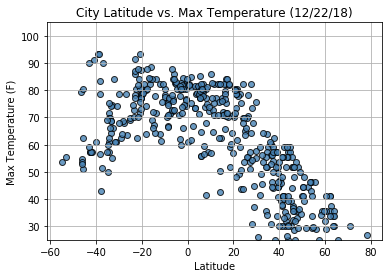

In [314]:
#plot
plt.scatter(csvfile_read['Lat'],csvfile_read['Max Temp'],
            alpha=.8, linewidths=1.0, edgecolors='black',
            color='steelblue')

# Incorporate a text label regarding circle size
plt.title("City Latitude vs. Max Temperature (12/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#adjust scale
plt.ylim(25, 105)
#add grid
plt.grid(True, alpha=1, clip_on=True)

# Save Figure
Lat_temp = plt.show()

# Show plot
plt.show(Lat_temp)

#### Latitude vs. Humidity Plot

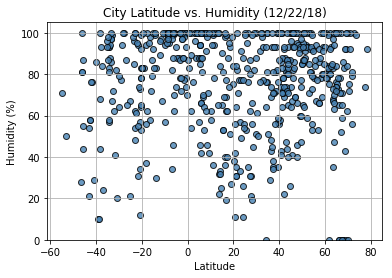

In [316]:
#plot
plt.scatter(csvfile_read['Lat'],csvfile_read['Humidity'],
            alpha=.8, linewidths=1.0, edgecolors='black',
            color='steelblue')

# Incorporate a text label regarding circle size
plt.title("City Latitude vs. Humidity (12/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#adjust scale
plt.ylim(0, 105)
#add grid
plt.grid(True, alpha=1, clip_on=True)

# Save Figure
Lat_humidity = plt.show()

# Show plot
plt.show(Lat_humidity)

#### Latitude vs. Cloudiness Plot

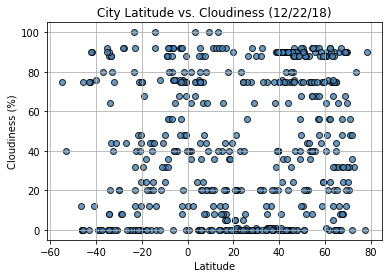

In [317]:
#plot
plt.scatter(csvfile_read['Lat'],csvfile_read['Cloudiness'],
            alpha=.8, linewidths=1.0, edgecolors='black',
            color='steelblue')

# Incorporate a text label regarding circle size
plt.title("City Latitude vs. Cloudiness (12/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#add grid
plt.grid(True, alpha=1, clip_on=True)

# Save Figure
Lat_cloud = plt.show()

# Show plot
plt.show(Lat_cloud)

#### Latitude vs. Wind Speed Plot

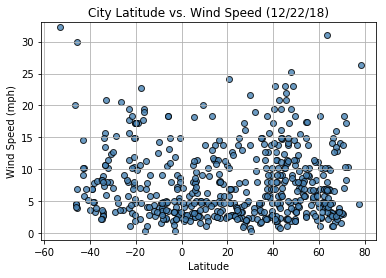

In [318]:
#plot
plt.scatter(csvfile_read['Lat'],csvfile_read['Wind Speed'],
            alpha=.8, linewidths=1.0, edgecolors='black',
            color='steelblue')

# Incorporate a text label regarding circle size
plt.title("City Latitude vs. Wind Speed (12/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#adjust scale
plt.ylim(-1, 33)
#add grid
plt.grid(True, alpha=1, clip_on=True)


# Save Figure
Lat_wind = plt.show()

# Show plot
plt.show(Lat_wind)